# SCS 3253: Machine Learning
> Assignment 2: Machine Learning Internals

> Assigned: June 7th, 2022

> **Due Date: June 21st, 2022, 6:30pm EST**

Please review the assignment early so you have ample opportunity to ask clarifying questions. 

### Your name & student number:

<pre> Name : Nnamdi Joseph Asouzu </pre>

<pre> Student Number : X487118  </pre>


# Instructions and Marking Guidelines
***
This assignment will account for 15% of your final grade. It is worth 28 marks in total (22 for Part 1, and 6 for Part 2).

Please read the provided markdown (text) cells carefully. Some subsections contain multiple questions. Be sure to answer all questions. 

Answers should be provided within this same notebook and will be a mix of code, outputs (e.g. plots, trained models), and written reponses. 

#### TIPS


> ⏳ **Please budget 4-5 hours to complete each assignment.** Reach out to us if you think your assignment will be more than 1 week late. 

> 📚 **You will likely need to refer to the documentation of libraries such as sklearn** while completing this assignment. Looking up things in 'the docs' is part of the day-to-day life of a Data Scientist. We encourage you to visit the docs if you haven't already. It's a great way to become more familiar and comfortable with the ML tools available to you. **When in doubt, GOOGLE!** 
* You can find the scikit-learn docs [here](https://scikit-learn.org/stable/modules/classes.html)
* You can also find a variety of helpful guides and tutorials through the [main scikit-learn website](https://scikit-learn.org/stable/)
* Other helpful references can be found here:
 * [MatPlotLib](https://matplotlib.org/)
 * [Seaborn](seaborn.pydata.org)
 * [Pandas](https://pandas.pydata.org/docs/)
 * [Numpy](https://numpy.org/doc/)


> 💣  **When you enounter errors** (because it's a law of nature in coding), please carefully read what the error message is telling you. Debugging is a key skill to develop. It's about understanding the root cause of an error, trying a fix, and repeating with a new hypothesis as necessary. If you get totally stuck, try googling the error message. You can find many common errors and solutions documented on [stackoverflow](https://stackoverflow.com/). 



### Marking Guidelines

All questions will state the number of marks available, e.g. [X points].

In machine learning, there is not necessarily one "correct" answer to a given modelling problem. You **do not** need to have the "best" performing model in the class in order to receive full marks. Rather, we will be marking assignments individually, based on the following criteria:

* **Demonstration of core concepts [40%]**
 * Do your answers to written questions demonstrate you understand and can apply the core concepts taught in class? Are those answers justified by the calculations / plots / models you produced?

* **Reasonable outputs [30%]** 
 * Do the values you obtain make sense? Did you follow the expected steps. Do you show all steps and make your reasoning clear?

* **Effort [15%]** 
 * Are data visualizations or plots clear and easy to interpret? Did you make a reasonable effort to maximize the performance of the models you submitted?

* **Clean code [15%]** 
 * Is your python code easy to follow? Related code should be organized into re-usable functions and not be scattered across notebook cells. Function and variable names should be well-chosen to convey what they do or represent. Functions should have docstrings explaining what they do. Comments should be used to explain the details of what you are doing, to help your evaluator follow along. 

In [1]:
# === NOTEBOOK & IMPORT SETUP ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
import random
random.seed(50)

pd.set_option("display.max_columns", None)
%matplotlib inline

# Dataset: Fashion-MNIST
***
For this assignment, we'll be using the `fashion-MNIST` dataset. It is similar to the handwritten digits dataset we considered in lecture 3, but uses images of common clothing items instead of digits. 

There are 10 classes in total, which map to integer labels between 0 and 9 according to the following table:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


A preview of this dataset is shown below. The first 3 rows show samples of label 0 = T-shirt, the next 3 rows show samples of label 1 = Trouser, the next 3 rows show samples of label 2 = Pullover, and so-forth. 

![](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)


If interested, you can find more information about this dataset [here](
https://github.com/zalandoresearch/fashion-mnist). 

Run the following code snippets to load and shape this dataset. 

In [2]:
# Note: run in Google colab, which already has the tensorflow library installed
# OR install tensorflow via 'conda install -c conda-forge tensorflow' or 'pip install tensorflow' (depending on your vitual environment)...
# ... Install tensorflow may take a few minutes!
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"X_train.shape = {X_train.shape}") # 60,000 training images, 28x28 pixel arrays
print(f"y_train.shape = {y_train.shape}") # 60,000 labels for the training images
print(f"X_test.shape = {X_test.shape}") # 10,000 test images, 28x28 pixel arrays
print(f"y_test.shape = {y_test.shape}") # 10,000 test labels

4431872/4422102 [==============================] - 0s 0us/step
X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
X_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [3]:
# each pixel will be treated as one input feature, so we want to reshape
# our 28x28 pixel array into a feature vector with 784 elements
num_features = 28 * 28

X_train = X_train.reshape(-1, num_features)
X_test = X_test.reshape(-1, num_features) # -1 means unspecified

# show the new dimensions
print(f"X_train.shape = {X_train.shape}") # 60,000 images, 28x28 pixel arrays
print(f"y_train.shape = {y_train.shape}") # 60,000 labels
print(f"X_test.shape = {X_test.shape}") # 10,000 test images, 28x28 pixel arrays
print(f"y_test.shape = {y_test.shape}") # 10,000 test labels


X_train.shape = (60000, 784)
y_train.shape = (60000,)
X_test.shape = (10000, 784)
y_test.shape = (10000,)


The following helper functions might be useful to you, when exploring your data. 

In [4]:
num_classes = len(np.unique(y_train))
print(f"There are {num_classes} different classes")

# dictionary
# you can use this to convert a numerical label back into 
# the description of what it represents
label_mapping = {
    0: "T-shirt/top", 
    1: "Trouser", 
    2: "Pullover", 
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

There are 10 different classes


Displaying image for sample with label 'Sandal'


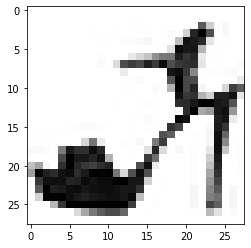

In [5]:
# if you want to visualize what a given sample looks like
def display_sample(feature_vector):
  """Plots a fasion-MNIST image given its feature vector"""
  image = feature_vector.reshape(28, 28)
  plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")

sample_id = 9
print(f"Displaying image for sample with label '{label_mapping[y_train[sample_id]]}'")
display_sample(X_train[sample_id])

# Part 1: Softmax Regression Classifier from Scratch [22 points]
***

In lecture 4, we demonstrated how machine learning models are trained under the hood using various forms of gradient descent. We even gave some examples of writing training algorithms from scratch, instead of using pre-built scikit learn models. 

For Part 1 of this assigment, your goal is to use what you have learned to implement a **softmax regression classifier** from scratch and apply this to the fashion-MNIST dataset. 

### Background

A review of softmax regression is given in Chapter 4 of the textbook (Hands-On Machine Learning by Aurelien Geron, 2nd Edition). Softmax regression is similar to logistic regression, except that each class $k$ now gets its own scoring function:

> $s_{k}(x) = x^{T}\theta^{(k)} = x_{0}\theta_{0}^{(k)} + x_{1}\theta_{1}^{(k)} + x_{2}\theta_{2}^{(k)} + ... $

where $\theta^{(k)}$ is the vector of feature weights associated with the $k$th class, and $x_{0} = 1$ by convention so that $\theta_{0}^{(k)}$ is a bias term. 

Instead of applying the sigmoid logistic function to the score function, we now apply the 'softmax' function:

> $\hat{p}_{k} = \frac{\exp{(s_{k}(x) )}}{\sum_{j=1}^{K}\exp{(s_{j}(x))}}$

where $K$ is the total number of classes, and $\hat{p}_{k}$ can be thought of as the pseudo-probability that a given sample belongs to class $k$. The class prediction is simply

> $\hat{y} = \text{argmax}_{k}(\hat{p}_{1}, \hat{p}_{2}, ..., \hat{p}_{K})$

i.e. the class $k$ with the greatest psuedo-probability score $\hat{p}_{k}$.

The loss function for softmax regression is called the 'cross entropy' and is given by

> $J(\Theta) = \frac{1}{-m}\sum_{i=1}^{m}\sum_{k=1}^{K}y^{(i)}_{k}log(\hat{p}_{k}^{(i)})$

where $m$ is the number of training instances, and $y^{(i)}_{k}$ is the target probability that the $i$th instance belongs to class $k$. Note that $y^{(i)}_{k}$ is equal to either 0 or 1.

Note that $\Theta$ is called the 'parameter matrix' and it is of dimension (num_classes = $K$, num_features = $N$):

$$
\Theta = \begin{bmatrix}
    \theta_{0}^{(1)}  & \theta_{1}^{(1)} & \dots & \theta_{N}^{(1)} \\
    \theta_{0}^{(2)}  & \theta_{1}^{(2)} & \dots & \theta_{N}^{(2)} \\
    \vdots \\
    \theta_{0}^{(K)}  & \theta_{1}^{(K)} & \dots & \theta_{N}^{(K)}
\end{bmatrix}
$$

<br/>

The gradient vector with respect to $\theta_{0}^{(k)}$ is

> $\nabla_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i=1}^{m}(\hat{p}_{k}^{(i)} - y_{k}^{(i)})x^{(i)}$

It must be computed for every class, and it only updates the weights of that class, i.e. 

> $\theta_{(\text{next step})}^{(k)} = \theta_{(\text{previous step})}^{(k)} - \eta \nabla_{\theta^{(k)}}$



### 🎯 Objectives

#### A) Implement a classifier and prove that it learns [10 points]

Build a softmax regression classifier *from scratch*, using mini-batch gradient descent. Then train this classifier on the `fashion-MNIST` dataset. 

You can use `sklearn` libraries for any data pre-processing steps or scoring (e.g. computing accuracy); however, you may not use any sklearn classifier objects such as `sklearn.linear_model.LogisticRegression` since the point of this exercise is to build your own classifier.

You **do not** need to implement k-fold cross validation for this classifier, yet. 

Ensure all of the following requirements are met:

1. You should be able to adjust the `learning_rate` ($\eta$),  `minibatch_size`, and the maximum number of iterations `max_iter`. 

2. Split your training data upfront into train and validation subsets, so that you have a way to evaluate generalization performance with each iteration or epoch.

3. Plot the cost function, sum of gradients over $k$, training dataset accuracy, and validation dataset accuracy as a function of iterations (gradient steps) or epochs (complete passes over the training data). These give you the 'learning curves'.

4. Pick values of `learning_rate`, `minibatch_size`, and `max_iter` that are sufficient for you to show that your model is learning from the data (see note below); you don't need to optimize these yet (we'll do that in part B).  

5. Evaluate your final model on the test dataset, (`X_test`, `y_test`).

Note that if your classifier is built correctly and is learning from the data, the learning curves you plot should show the following trends as the number of iterations or epochs increases:
* gradients should get smaller
* cost function should decrease
* training accuracy should begin to plateau
* validation accuracy should increase and begin to plateau
* training accuracy should not be lower than the valiation accuracy

**Hints**:
* Remember to follow best-practices when preprocessing your training and testing data (e.g. adjust the feature scales). 
* Your model parameters $\theta_{(k)}$ should be randomly initialized to small non-zero values. You may want to set a random seed for reproducibility, using `numpy.random.seed`.  
* It is important to shuffle your data between epochs. 
* You should be able to see evidence of learning within the first 50 epochs of training. 
* Your training procedure should return a 'trained' model that you can then re-use on your test dataset. If you know how to write python classes, we recommend building a custom class with `.fit()` and `.predict()` methods, and storing the model parameters as class attributes (i.e. `self.parameter_matrix`). If you are uncomfortable with classes, then alternatively you could take a functions-based approach, e.g. where `train()` returns the coefficients of a trained model, which you then pass to some `predict()` function. 


### Data preprocessing

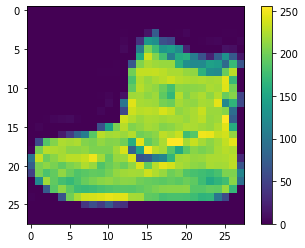

In [6]:
plt.figure()
plt.imshow(X_train[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()
          

In [7]:
# normalization of values 
X_train = X_train / 255.0
X_test = X_test / 255.0

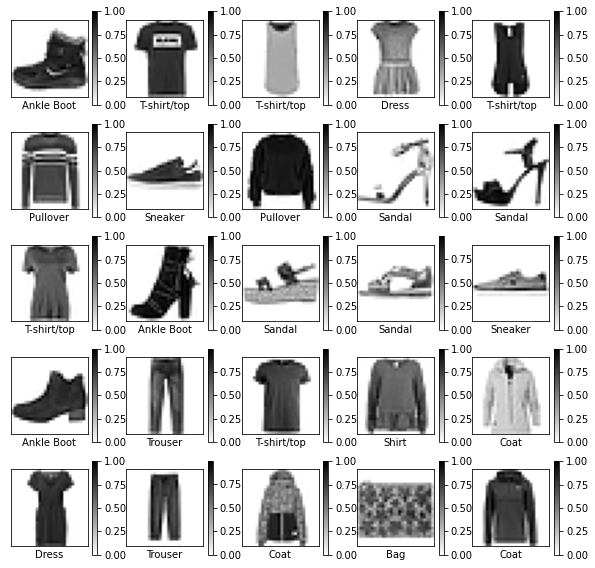

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel(label_mapping[y_train[i]])
plt.show()

### Build softmax classifier model from scratch

In [9]:
X_train = np.c_[np.ones([len( X_train), 1]),  X_train]
X_test = np.c_[np.ones([len( X_test), 1]),  X_test]

from sklearn.model_selection import train_test_split
XX_train,validation_train, yy_train,validation_test = train_test_split( X_train, y_train, test_size=0.2)

# input data
train_dataset = XX_train.copy()
train_labels = yy_train.copy()
test_dataset = X_test.copy()
test_labels =  y_test.copy()
valid_dataset = validation_train.copy()
valid_labels = validation_test.copy()

In [10]:
def to_one_hot(y):
    #n_classes = y.max() + 1
    n_classes =10
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

def learning_schedule(t, t0=5, t1=50):
    return t0 / (t + t1)

def softmaxx(X, y,eta,use_lrs,n_epochs, minibatch_size,epsilon,max_iter):
    """softmax regression using minibatch gradient descent."""
    m = X.shape[0]
    n = X.shape[1]
    k = len(np.unique(y))
    theta= np.random.randn(n,k) # random initialization of feature weights
    losses = []
    thetas = []
    grads = []
    g_bias = [] # magnitude of gradient from bias term
    accuracy =[]
    max_accuracy = 0
    t=0
    
    for epoch in range(n_epochs):
        # re-shuffle your training data for this epoch
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        # train on one mini-batch at a time
        for i in range(0, m, minibatch_size):
            # note: axis 0 is your training samples, axis 1 is the feature values
            xi = X_b_shuffled[i:i+minibatch_size,:]
            yi = y_shuffled[i:i+minibatch_size]
            y_hot = to_one_hot(yi)
            hypothesis = xi.dot(theta)
            probs = softmax(hypothesis)
            loss = -np.mean(np.sum(y_hot * np.log(probs + epsilon), axis=1))
            gradients = 1/minibatch_size * xi.T.dot(probs - y_hot)
            theta = theta - (eta * gradients)
            preds = np.argmax(probs,axis=1)
            accur = sum(yi==preds)/ float(len(yi))
            losses.append(loss)
            thetas.append(theta)
            accuracy.append(accur)
            grads.append(gradients)
            g_bias.append(gradients[0][0])
            if use_lrs:
                eta = learning_schedule(t) 
            if len(g_bias)==max_iter:
                print(f"Max iter limit has been reached! Training ran for {t} epochs ")
                return losses, accuracy,eta,minibatch_size
        t = t+ 1  
    return losses, accuracy,eta,minibatch_size

lrs = [learning_schedule(i) for i in range(500)]


In [11]:
# Run model on training set
losses, accuracy,eta,minibatch_size = softmaxx(train_dataset,train_labels,eta= 0.001,use_lrs=True,n_epochs = 50,minibatch_size=480,epsilon=1e-07,max_iter = 9000)

In [12]:
# Run model on validation set
losses_val, accuracy_val,eta,minibatch_size= softmaxx(valid_dataset,valid_labels,eta= 0.001,use_lrs=True,n_epochs = 50,minibatch_size=480,epsilon=1e-07,max_iter = 9000)

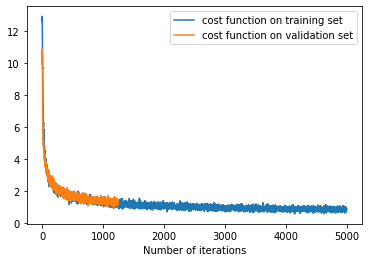

In [13]:
plt.plot(losses, label = "cost function on training set")
plt.plot(losses_val, label = "cost function on validation set")
plt.xlabel("Number of iterations")
plt.legend(loc="upper right");

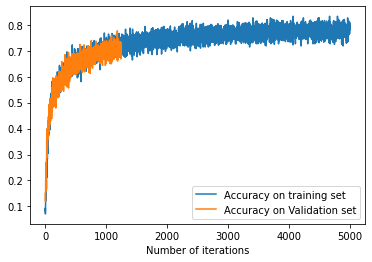

In [14]:
plt.plot(accuracy,label="Accuracy on training set")
plt.plot(accuracy_val,label="Accuracy on Validation set")
plt.xlabel("Number of iterations")
plt.legend(loc="lower right");

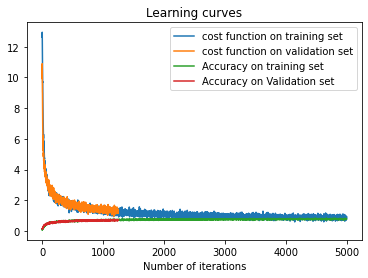

In [15]:
plt.plot(losses, label = "cost function on training set")
plt.plot(losses_val, label = "cost function on validation set")
plt.plot(accuracy,label="Accuracy on training set")
plt.plot(accuracy_val,label="Accuracy on Validation set")
plt.xlabel("Number of iterations")
plt.legend(loc="upper right");
plt.title("Learning curves");

In [16]:
# Run model on test set
losses_test, accuracy_test,eta,minibatch_size = softmaxx(test_dataset,test_labels,eta= 0.001,use_lrs=True,n_epochs = 50,minibatch_size=480,epsilon=1e-07,max_iter = 9000)
accuracy_without_tuning = round(np.mean(accuracy_test),2)*100 
print(f'Accuracy on test data without tuning hyperparameter is {accuracy_without_tuning} %')

Accuracy on test data without tuning hyperparameter is 61.0 %


#### B) Find Optimal Hyperparameter Values [5]

i) Add a toggle for `early stopping`, so that model training ends if the validation accuracy plateaus and then worsens with increasing epochs (due to overfitting). The model parameters you should keep are the ones from the iteration that yielded the best validation accuracy.

ii) Then add k-fold cross-validation to your model training routine. Perform gridsearch optimization on `learning_rate` ($\eta$), `minibatch_size` with at least 3 cross-validation folds. Plot the validation dataset accuracy (with error bars) as a function of these hyperparameters, and select the best combination. 

iii) Evaluate this version of your model on the test dataset. Is it higher than what you got for the original (unoptimized) model at the end of question (A) ?


> NOTE: If model training takes too long, it is okay to limit `max_iter` to a set value (such as 100 or 200) for the remainder of Part 1 of this assignment, as long as you keep it consistent. You'll then focus on how well you can improve the model performance within that constraint. 

In [17]:
random.seed=60
### prepare Kfolds
## fold 1
X_tr1 = X_train[0:40000,:]
y_tr1 = y_train[0:40000]
X_val1 = X_train[40000:60000,:]
y_val1 = y_train[40000:60000]

## fold 2
X_tr2 = X_train[20000:60000,:]
y_tr2 = y_train[20000:60000]
X_val2 = X_train[0:20000,:]
y_val2 = y_train[0:20000]

## fold 3
X_tr3a = X_train[0:20000,:]
y_tr3a = y_train[0:20000]
X_tr3b = X_train[40000:60000,:]
y_tr3b = y_train[40000:60000]
X_tr3 = np.vstack((X_tr3a,X_tr3b))
y_tr3 = np.hstack((y_tr3a,y_tr3b))
X_val3 = X_train[20000:40000,:]
y_val3 = y_train[20000:40000]


In [18]:
learning_rates = [ 1e-4,1e-3,1e-2] 
minibatch_size = [*range(100, 500,50)]
parameters = [] 
accuracy_validation = []
params = []
find_max1 = []
list_of_accuracy1 = []
for i in learning_rates :        
  for j in minibatch_size :            
      parameters.append( ( i, j ) )  
for k in range( len( parameters ) ) :
  losses_tr1, accuracy_tr1,eta_tr1,minibatch_size_tr1 = softmaxx(X_tr1,y_tr1,eta= parameters[k][0],use_lrs=True,n_epochs = 50,minibatch_size=parameters[k][1],epsilon=1e-07,max_iter = 1e6)
  accur = np.mean(accuracy_tr1)
  find_max1.append([accur,eta_tr1,minibatch_size_tr1])
for i in find_max1:
  list_of_accuracy1.append(i[0])
indexNum =(list_of_accuracy1.index(max(list_of_accuracy1)))
best_params1 = find_max1[indexNum]
params.append(best_params1)
losses_val1, accuracy_val1,eta_val1,minibatch_size_val1 = softmaxx(X_val1, y_val1,eta= best_params1[1],use_lrs=True,n_epochs = 50,minibatch_size=best_params1[2],epsilon=1e-07,max_iter = 1e6)
accur_val1 = round(np.mean(accuracy_val1),4)*100
accuracy_validation.append(accur_val1) 

find_max2 = []
list_of_accuracy2 = []
for k in range(len(parameters)) :
  losses_tr2, accuracy_tr2,eta_tr2,minibatch_size_tr2 = softmaxx(X_tr2,y_tr2,eta= parameters[k][0],use_lrs=True,n_epochs = 50,minibatch_size=parameters[k][1],epsilon=1e-07,max_iter = 1e6)
  accur2 = np.mean(accuracy_tr2)
  find_max2.append([accur2,eta_tr2,minibatch_size_tr2])
for i in find_max2:
  list_of_accuracy2.append(i[0])
indexNum2 =(list_of_accuracy2.index(max(list_of_accuracy2)))
best_params2 = find_max2[indexNum2]
params.append(best_params2)
losses_val2, accuracy_val2,eta_val2,minibatch_size_val2 = softmaxx(X_val2, y_val2,eta= best_params2[1],use_lrs=True,n_epochs = 50,minibatch_size=best_params2[2],epsilon=1e-07,max_iter = 1e6)
accur_val2 = round(np.mean(accuracy_val2),4)*100
accuracy_validation.append(accur_val2) 

find_max3 = []
list_of_accuracy3 = []
for k in range( len( parameters ) ) :
  losses_tr3, accuracy_tr3,eta_tr3,minibatch_size_tr3 = softmaxx(X_tr3,y_tr3,eta= parameters[k][0],use_lrs=True,n_epochs = 50,minibatch_size=parameters[k][1],epsilon=1e-07,max_iter = 1e6)
  accur3 = np.mean(accuracy_tr3)
  find_max3.append([accur3,eta_tr3,minibatch_size_tr3])
for i in find_max3:
  list_of_accuracy3.append(i[0])
indexNum3 =(list_of_accuracy3.index(max(list_of_accuracy3)))
best_params3 = find_max3[indexNum3]
params.append(best_params3)
losses_val3, accuracy_val3,eta_val3,minibatch_size_val3 = softmaxx(X_val3, y_val3,eta= best_params3[1],use_lrs=True,n_epochs = 50,minibatch_size=best_params3[2],epsilon=1e-07,max_iter = 1e6)
accur_val3 = round(np.mean(accuracy_val3),4)*100
accuracy_validation.append(accur_val3) 

print (f' accuracy from cross validation folds are {accuracy_validation}')

 accuracy from cross validation folds are [77.08, 77.14999999999999, 77.5]


In [21]:
accuracy_validation   # accuracy of each validation set in the 3 folds CV

[77.08, 77.14999999999999, 77.5]

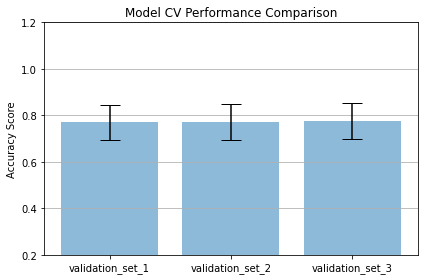

In [25]:
### plot of accuracy obtained from the Kfold validation sets

validation_scores = {
    "validation_set_1": accuracy_val1, 
    "validation_set_2": accuracy_val2,
    "validation_set_3": accuracy_val3, 
}

def plot_scores(validation_scores, y_range=(0.2, 1.2)):

  labels = []
  means = []
  stdevs = []
  for name in validation_scores.keys():
    labels.append(name)
    means.append(np.mean(validation_scores[name]))
    stdevs.append(np.std(validation_scores[name]))

  # Build the plot
  x_pos = np.arange(len(labels))
  fig, ax = plt.subplots()
  ax.bar(x_pos, 
        means,
        yerr=stdevs,
        align='center',
        alpha=0.5,
        ecolor='black',
        capsize=10)
  ax.set_ylabel('Accuracy Score')
  ax.set_xticks(x_pos)
  ax.set_xticklabels(labels)
  ax.set_title('Model CV Performance Comparison')
  ax.yaxis.grid(True)

  # Save the figure and show
  plt.tight_layout()
  plt.savefig('bar_plot_with_error_bars.png')
  plt.ylim(y_range)
  plt.show()

plot_scores(validation_scores)


In [26]:
params

[[0.798451, 0.050505050505050504, 100],
 [0.8006635, 0.050505050505050504, 100],
 [0.7983705, 0.050505050505050504, 100]]

In [31]:
### test the optimized hyperparameters on the test dataset
losses_test2, accuracy_test2,eta_test2,minibatch_size_test2 = softmaxx(test_dataset,test_labels,eta=params[2][1] ,use_lrs=True,n_epochs = 50,minibatch_size=params[2][2],epsilon=1e-07,max_iter = 1e6)
accuracy_with_tuning = round(np.mean(accuracy_test2),2)*100
print(f'Accuracy on test data with tuned hyperparameters is {accuracy_with_tuning} %')

Accuracy on test data with tuned hyperparameters is 73.0 %


###### The accuracy on the test parameter with tuning is higher than the previous accuracy obtained without tuning the hyperparameters

#### C) Add Regularization [5 points]

Add `L1` and `L2` regularization penalty terms to your loss function (during training only) and to your gradient calculation. You should be able to tune the strength of your `L1` and `L2` regularizations independently. 

Experiment with different regularization strengths (including no regularization). For your 'best' values, plot the learning curves. Do you see any improvement in generalization performance, compared to earlier models? If you've used non-zero `L1` regularization, have any of your feature weights been set to zero (or very close to it)?

> Note: your gradients are computed independenty for each class. This means that regularization should also be independent, i.e. the gradient for class `k=1` should not be penalized by the weights for class `k=2`.




#### D) Examine Misclassifications [2 points]

Plot the confusion matrix for your final model. Examine the 3-4 largest off-diagonal elements. Are there any classes that your model tends to mistake for each other?

Pick any two of these classes and plot a visualization of their weights. Can you offer any reasons for why these misclassifications are occuring, based on the value of the weights and the general shapes of the objects being classified?



#### E) Bonus (Optional): Experiment with Learning Schedule [1 point]

This question is totally optional and is worth 1 bonus point. You can skip it if you'd like.

Implement a learning rate that changes as a function of training epochs or iterations; for example, one that starts high, then gradually becomes lower. Do you see any improvement to model performance?

# Part 2: Support Vector Machines [6 points]
***

#### A) Tune a Linear SVM Classifier [3 points]

Using `GridSearchCV` and the `SVC` module in `sklearn`, tune a *linear* support vector machine classifier on the `fashion-MNIST` dataset. Use whatever hyperparms you see fit to improve your models accuracy. Be sure to follow the usual preprocessing steps (where required) before training your models. Also, recall that support vector machines can **not** natively handle multi-class problems, so you will need to employ the `decision_function_shape` argument to try different voting strategies. 

#### B) Tune a Non-Linear SVM Classifier [3 points]

Use the `SVC` kernel argument to train a non-linear support vector machine. Use `GridSearchCV` to test out different kernels. 

Do you see any improvements in accuracy compared to the Linear SVC model? What do the results tell you about the dataset?